# SECTION1

# PROJECT

##🕹️ Data Description
Name : 게임의 이름입니다.\
Platform : 게임이 지원되는 플랫폼의 이름입니다.\
Year : 게임이 출시된 연도입니다.\
Genre : 게임의 장르입니다.\
Publisher : 게임을 제작한 회사입니다.\
NA_Sales : 북미지역에서의 출고량입니다.\
EU_Sales : 유럽지역에서의 출고량입니다.\
JP_Sales : 일본지역에서의 출고량입니다.\
Other_Sales : 기타지역에서의 출고량입니다.


1.지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.\
2.연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.\
3.출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

##1. EDA

In [158]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [159]:
#Data 불러오기
from google.colab import files
uploaded = files.upload()

Saving vgames2 (1).csv to vgames2 (1) (1).csv


In [160]:
df = pd.read_csv('vgames2 (1).csv', sep=",")
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [161]:
#필요 없는 Column =  Unnamed: 0는 삭제해 줍니다.
df= df.drop(df.columns[[0]],axis=1)
df.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [170]:
#행,열 개수 확인 및 Data 정보 확인.
print(f'Shape of dataset: {df.shape} \n')
df.info()

Shape of dataset: (16177, 9) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16177 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16177 non-null  object 
 1   Platform     16177 non-null  object 
 2   Year         16177 non-null  float64
 3   Genre        16177 non-null  object 
 4   Publisher    16141 non-null  object 
 5   NA_Sales     16177 non-null  object 
 6   EU_Sales     16177 non-null  object 
 7   JP_Sales     16177 non-null  object 
 8   Other_Sales  16177 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


In [171]:
#결측치가 데이터양에 비해 적음으로 판단하여, 제거한다.
#기준이 되는 Year의 결측치를 알 수 없기에 제거한다.

df.dropna(subset=['Year',], inplace=True)

In [172]:
#Year에 1900미만인 데이터 삭제.
df= df[df['Year'] > 1900]

In [173]:
#또 기준이 되는 Genre의 결측치를 알 수 없기에 제거한다.
df.dropna(subset=['Genre'], inplace=True)
df.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher      36
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

In [174]:
# #df에서 M,K 문자 발견, M = 1000,000, K = 0.0001으로 변경 합니다.
Sales= ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']

for i in Sales:
  df[i] =df[i].replace({"K":"*0.001", "M":""}, regex=True).map(pd.eval)

In [175]:
df[Sales]=round(df[Sales]*1000)

In [176]:
df[Sales]= df[Sales].astype(int)

In [177]:
#year의 Type은 정수로 바꿔준다.
df['Year']=df['Year'].astype(np.int64)

In [178]:
#이상치확인
df[Sales].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16177.000000,16177.000000,16177.000000,16177.000000
mean,264.923039,147.141003,77.779564,48.123261
std,821.771307,507.938396,306.450621,189.739726
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,80.000000,20.000000,0.000000,10.000000
75%,240.000000,110.000000,40.000000,40.000000
max,41490.000000,29020.000000,10220.000000,10570.000000


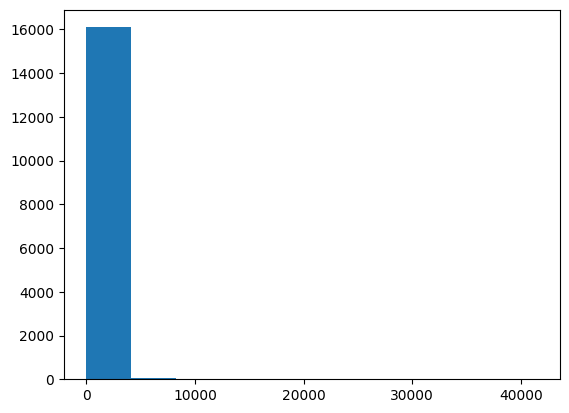

In [179]:
#히스토그램으로 이상치를 확인.
plt.hist(df['NA_Sales']);

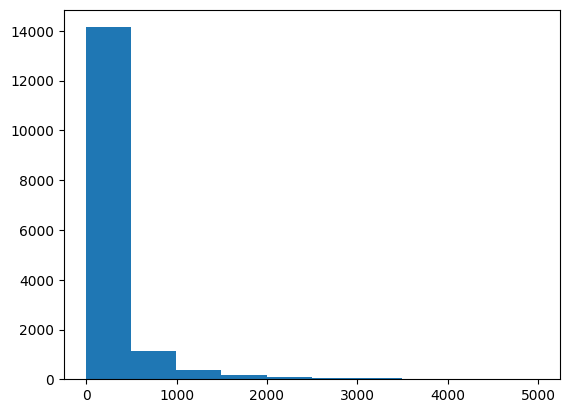

In [180]:
plt.hist(df['NA_Sales'][df['NA_Sales']<5000]);

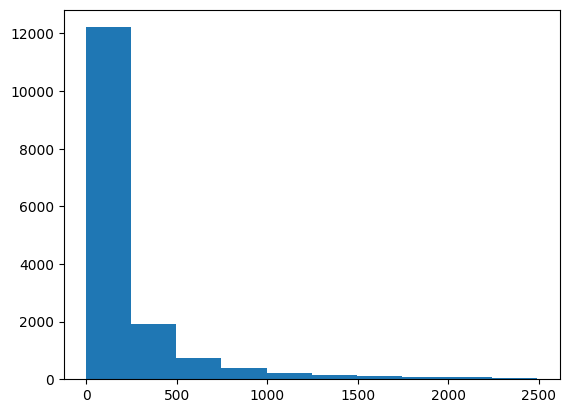

In [181]:
plt.hist(df['NA_Sales'][df['NA_Sales']<2500]);

In [182]:
len(df['NA_Sales'][df['NA_Sales']>=3000])/ len(df['NA_Sales'][df['NA_Sales']<3000])

0.008981475706355642

In [183]:
#3000이상 아닌부분이 0.89% 밖에 되지않으므로 제거한다.
df.drop(index = df[df.NA_Sales>=3000].index,inplace=True)

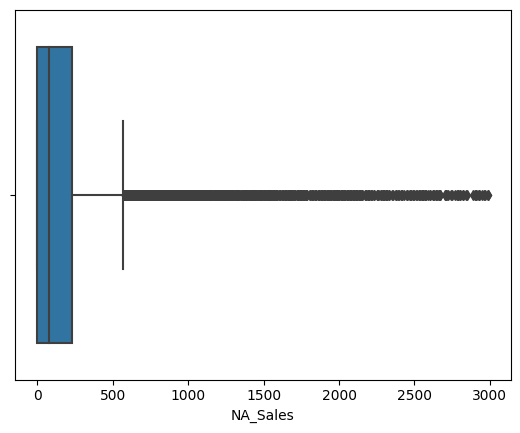

In [184]:
# 박스플롯을 이용해 확인.
sns.boxplot(x=df.NA_Sales)

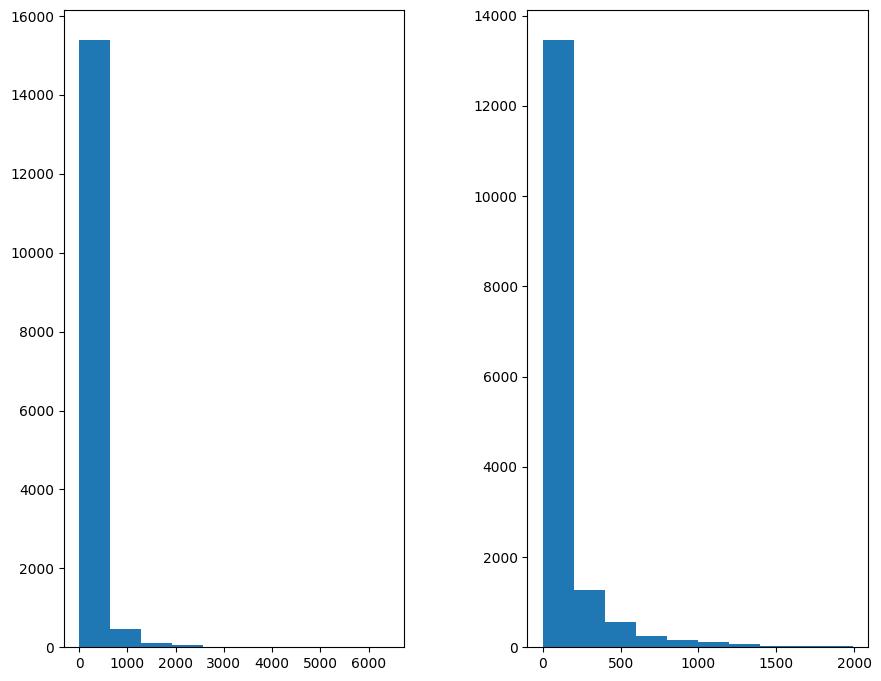

In [185]:
#이번에는 EU_Sales 출고량 이상치제거
fig = plt.figure(figsize=(10,8))
plt.subplot(121)

ax1 = plt.hist(df['EU_Sales']);
plt.subplot(122)

ax2 = plt.hist(df['EU_Sales'][df['EU_Sales']<2000]);
fig.tight_layout(pad=5.0)

In [186]:
len(df['EU_Sales'][df['EU_Sales']>=2000])/ len(df['EU_Sales'][df['EU_Sales']<2000])

0.004322225006264094

In [187]:
#3000이상 아닌부분이 0.4% 밖에 되지않으므로 제거한다
df.drop(index = df[df.EU_Sales>=2000].index,inplace=True)

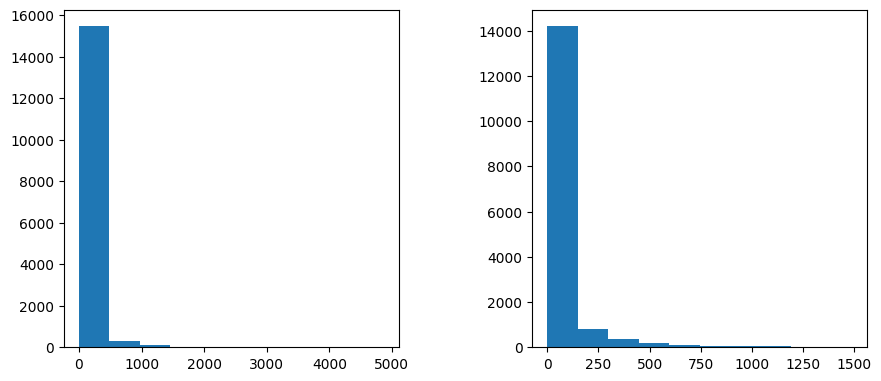

In [188]:
#JP_Sales 출고량 이상치제거
fig = plt.figure(figsize=(10,5))
plt.subplot(121)

ax1 = plt.hist(df['JP_Sales']);
plt.subplot(122)

ax2 = plt.hist(df['JP_Sales'][df['JP_Sales']<1500]); 
fig.tight_layout(pad=5.0) 

In [189]:
len(df['JP_Sales'][df['JP_Sales']>=1500])/ len(df['JP_Sales'][df['JP_Sales']<1500])

0.004277805737292401

In [190]:
#1500이상 아닌부분이 0.4% 밖에 되지않으므로 제거한다
df.drop(index = df[df.JP_Sales>=1500].index,inplace=True)

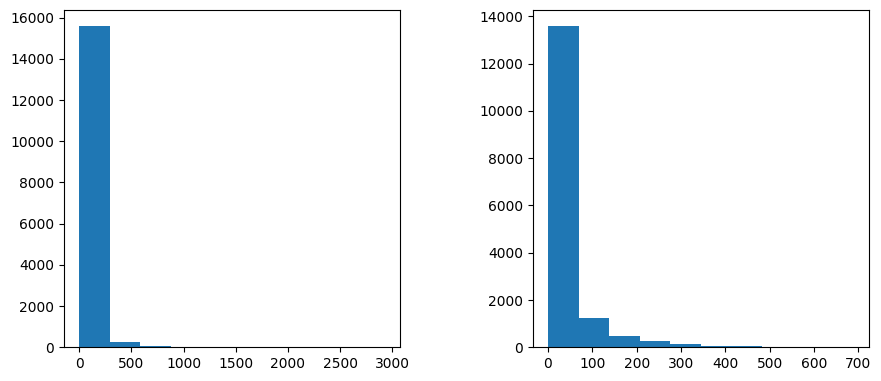

In [191]:
#Other_Sales 출고량 이상치제거
fig = plt.figure(figsize=(10,5))
plt.subplot(121)

ax1 = plt.hist(df['Other_Sales']);
plt.subplot(122)

ax2 = plt.hist(df['Other_Sales'][df['Other_Sales']<700]); 
fig.tight_layout(pad=5.0) 

In [192]:
len(df['Other_Sales'][df['Other_Sales']>=700])/ len(df['Other_Sales'][df['Other_Sales']<700])

0.0028389376064601604

In [193]:
#700이상 아닌부분이 0.42% 밖에 되지않으므로 제거한다
df.drop(index = df[df.Other_Sales>=700].index,inplace=True)

#1.지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.

In [194]:
#Sales 출고량 평균 구하기.
Sales_means = df.groupby('Genre',as_index=False)[Sales].mean()
Sales_means

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,217.981709,123.711763,40.444655,39.608956
1,Adventure,69.706582,43.132435,37.549564,11.808089
2,Fighting,235.164835,108.205128,86.080586,37.496947
3,Misc,183.599280,92.303539,46.880624,30.425915
4,Platform,293.837772,143.983051,71.985472,39.188862
5,Puzzle,141.724138,68.239564,70.054446,17.441016
6,Racing,228.008439,139.983122,20.599156,40.860759
7,Role-Playing,148.014235,70.790036,142.341637,25.572954
8,Shooter,288.522449,163.248980,24.946939,50.595918
9,Simulation,190.107527,100.298686,59.593787,30.382318


In [195]:
#내림차순으로 정렬한다.
NA_Sales = Sales_means.sort_values(by='NA_Sales',ascending = False)
EU_Sales = Sales_means.sort_values(by='EU_Sales',ascending = False)
JP_Sales = Sales_means.sort_values(by='JP_Sales',ascending = False)
Other_Sales = Sales_means.sort_values(by='Other_Sales',ascending = False)

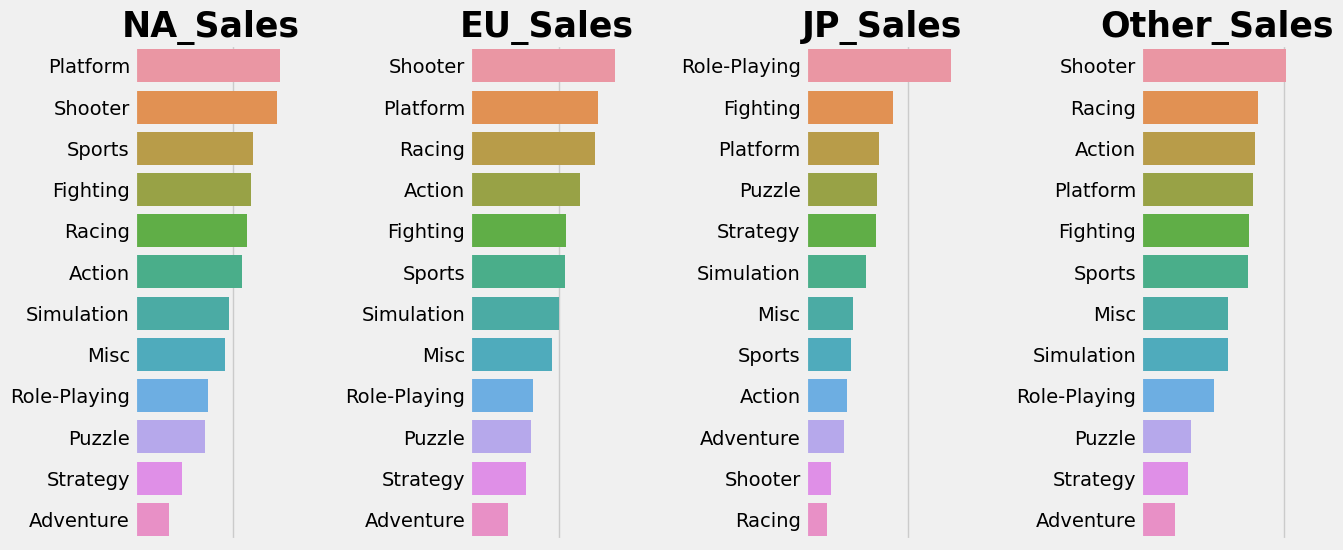

In [196]:

plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(14,12))
plt.subplot(241)
ax1 = sns.barplot(x=NA_Sales['NA_Sales'], y= NA_Sales['Genre'])
ax = plt.gca()
plt.title('NA_Sales',fontsize=25, fontweight='semibold')
ax1.set(xlabel=None , ylabel=None)
plt.tick_params(axis='x', which='both',bottom=False, top=False,labelbottom=False)

plt.subplot(242)
ax2 = sns.barplot(x=EU_Sales['EU_Sales'], y= EU_Sales['Genre'])
plt.title('EU_Sales',fontsize=25, fontweight='semibold')
ax2.set(xlabel=None , ylabel=None)
plt.tick_params(axis='x', which='both',bottom=False, top=False,labelbottom=False)

plt.subplot(243)
ax3 = sns.barplot(x=JP_Sales['JP_Sales'], y= JP_Sales['Genre'])
plt.title('JP_Sales',fontsize=25, fontweight='semibold')
ax3.set(xlabel=None , ylabel=None)
plt.tick_params(axis='x', which='both',bottom=False, top=False,labelbottom=False)

plt.subplot(244)
ax4 = sns.barplot(x=Other_Sales['Other_Sales'], y= Other_Sales['Genre'])
plt.title('Other_Sales',fontsize=25, fontweight='semibold')
ax4.set(xlabel=None , ylabel=None)
plt.tick_params(axis='x', which='both',bottom=False, top=False,labelbottom=False)

fig.tight_layout(pad=3.0)
plt.show;

In [197]:
df['All_Sales']=df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']

In [198]:
sales_year =df.groupby('Year',as_index=False)[['All_Sales']].sum()
sales_year.head()

,Year,All_Sales
0,1980,6570
1,1981,31180
2,1982,21070
3,1983,9180
4,1984,10190


##2.연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.

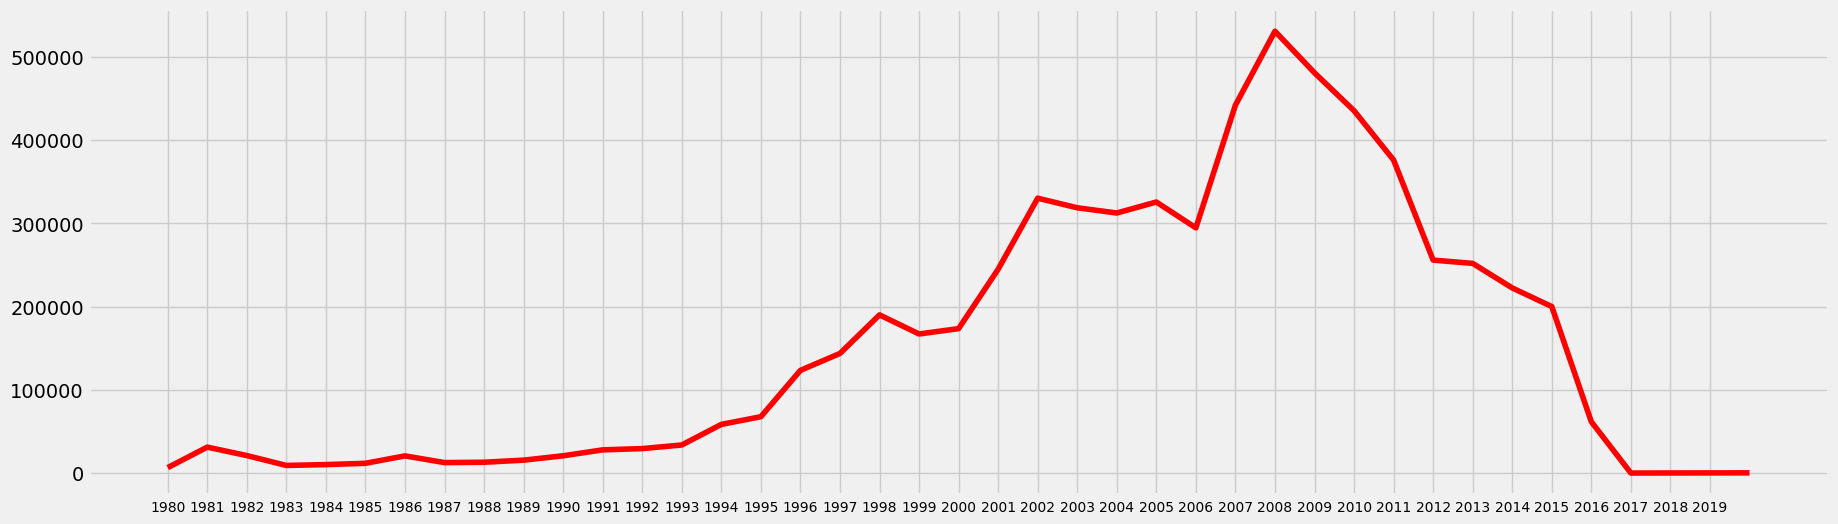

In [199]:
# 연도별 게임 출고량
# 2008년에 출고량이 제일 많은걸로 확인 됩니다.

from matplotlib import rc

fig = plt.figure(figsize=(20,6))
ax = sns.lineplot(x=sales_year.Year ,y=sales_year.All_Sales, color='r')
ax.set(xlabel=None , ylabel='')
ax.set_xticks(range(1980,2020))
ax.set_xticklabels(range(1980,2020), fontsize=10)
plt.show;

In [200]:
#총Sales에서 출고량이 가장 많은 게임순
Sales_r = df.groupby(['Name','Genre','Year'],as_index=False)['All_Sales'].sum().sort_values(by='All_Sales',ascending=False).reset_index(drop=True)
Sales_r.head()

,Name,Genre,Year,All_Sales
0,Battlefield 4,Shooter,2013,14040
1,LEGO Star Wars: The Complete Saga,Action,2007,9910
2,LEGO Marvel Super Heroes,Action,2013,9860
3,Assassin's Creed IV: Black Flag,Action,2013,9300
4,LEGO Batman: The Videogame,Action,2008,9180


In [201]:
rfm_r = df.groupby(['Genre'],as_index=False)['Year'].mean()#장르별 연동 평균
rfm_f = df.groupby(['Genre'],as_index=False)['Name'].count()#장르별 게임이름 개수
rfm_m = df.groupby('Genre',as_index=False)['All_Sales'].sum().sort_values(by='All_Sales',ascending=False).reset_index(drop=True)

In [202]:
rfm_r = rfm_r.set_index('Genre')
rfm_f = rfm_f.set_index('Genre')
rfm_m = rfm_m.set_index('Genre')
rfm = rfm_r.join([rfm_f, rfm_m], how='inner')
col_names = ['Recency','Frequency','Monetary']
rfm.columns = col_names
rfm

,Recency,Frequency,Monetary
Genre,,,
Action,2007.940713,3171,1337360
Adventure,2008.178430,1261,204530
Fighting,2004.648352,819,382430
Misc,2007.256749,1667,588800
Platform,2004.159806,826,453470
Puzzle,2005.377495,551,163900
Racing,2004.898734,1185,508900
Role-Playing,2007.172242,1405,543340
Shooter,2005.832653,1225,645960


In [203]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)
rfm_scaled

array([[ 1.46924706,  2.57650889,  2.47273139],
       [ 1.658836  , -0.08344263, -0.96457167],
       [-1.15654305, -0.69899162, -0.42477646],
       [ 0.92375827,  0.48197115,  0.2014042 ],
       [-1.54617758, -0.68924311, -0.20922248],
       [-0.57502159, -1.07222042, -1.08785374],
       [-0.95685293, -0.18928364, -0.04103334],
       [ 0.85636082,  0.11709822,  0.06346665],
       [-0.21201513, -0.13357784,  0.37484262],
       [ 0.36548148, -0.67392402, -0.61912094],
       [-0.47625212,  1.28274189,  1.33157578],
       [-0.35082124, -0.91763685, -1.09744201]])

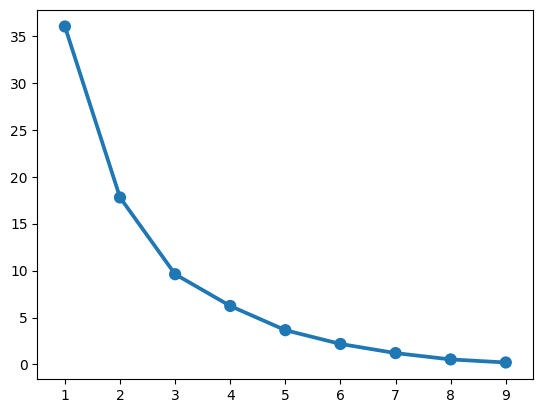

In [204]:
#K-means 그래프 표현
i = {} 

for k in range(1,10):
  kmeans = KMeans(n_clusters=k, random_state=1) 
  kmeans.fit(rfm_scaled)
  i[k] = kmeans.inertia_
plt.style.use('default')
sns.pointplot(x=list(i.keys()), y=list(i.values()))
plt.show()